In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from scipy.io import loadmat
from scipy.stats import zscore, mannwhitneyu

nsub = 100

PCI = np.zeros((nsub,101))

iterate= np.arange(0,nsub,1)

for i,t in enumerate(iterate):
    sub = i+1
    path ='PCI\PCI_%s.mat'%sub;
    PCI_val = loadmat(path)['PCI'];

    PCI[i,:] = PCI_val;

In [2]:
#Remove the outliers
PCI_list = []
for i,t in enumerate(iterate):
    PCI_v = np.delete(PCI[:,i], np.where(abs(zscore(PCI[:,i])) > 3))
    PCI_list.append(list(PCI_v))    

In [3]:
PCI_mean = np.zeros(100)
for i,t in enumerate(PCI_list):
    PCI_mean[i] = np.median(PCI_list[i])

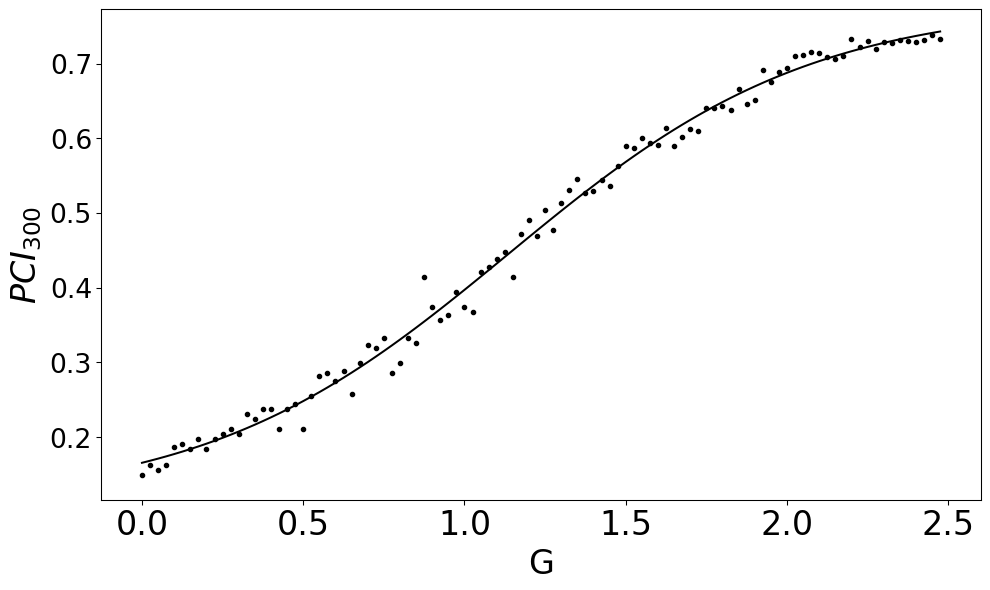

In [5]:
hfont = {'fontname':'Helvetica'}
my_dpi= 96
import scipy.optimize as opt
#plt.rc('font', family='serif')
plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')
G=np.arange(0,2.5,0.025)
def f(x, a, b, c, d):
    return a / (1. + np.exp(-c * (x - d))) + b

(a_, b_, c_, d_), _ = opt.curve_fit(f, G, PCI_mean)

y_fit = f(G, a_, b_, c_, d_)

fig,axs = plt.subplots(1, figsize=(1000/my_dpi, 600/my_dpi), dpi=my_dpi)

axs.scatter(G,PCI_mean, ls='solid', c='k', s=10)
axs.plot(G, y_fit, '-',c='k')
axs.set_xlabel('G',fontsize=25)
axs.tick_params(axis="x", labelsize=25)
axs.set_ylabel('$PCI_{300}$',fontsize=25)
axs.tick_params(axis="y", direction='out', top ='off',labelsize=20)
#axs.spines['right'].set_visible(False)
#axs.spines['top'].set_visible(False)
fig.tight_layout()

Other stuff

In [6]:
sub=np.arange(1,102,1)

integ=np.zeros((10,101))
integ2=np.zeros((10,101))
Q1=np.zeros((10,101))
Q2=np.zeros((10,101))
Q3=np.zeros((10,101))
mean_FC=np.zeros((10,101))

#Import data
for i,t in enumerate(sub):
    subject = t
  
    path = r'data2\netvars_%s.mat'%subject
         
    integ[:,i] = loadmat(path)['integ']
    integ2[:,i] = loadmat(path)['integ2']
    Q1[:,i] = loadmat(path)['Q1']
    Q2[:,i] = loadmat(path)['Q2']
    Q3[:,i] = loadmat(path)['Q3']
    mean_FC[:,i] = loadmat(path)['meanFC']
    

mean_integ = np.mean(integ,axis=0);
mean_integ2 = np.mean(integ2,axis=0);
mean_Q1 = np.mean(Q1,axis=0);
mean_Q2 = np.mean(Q2,axis=0);
mean_Q3 = np.mean(Q3,axis=0);
mean_dFC = np.mean(mean_FC,axis=0);

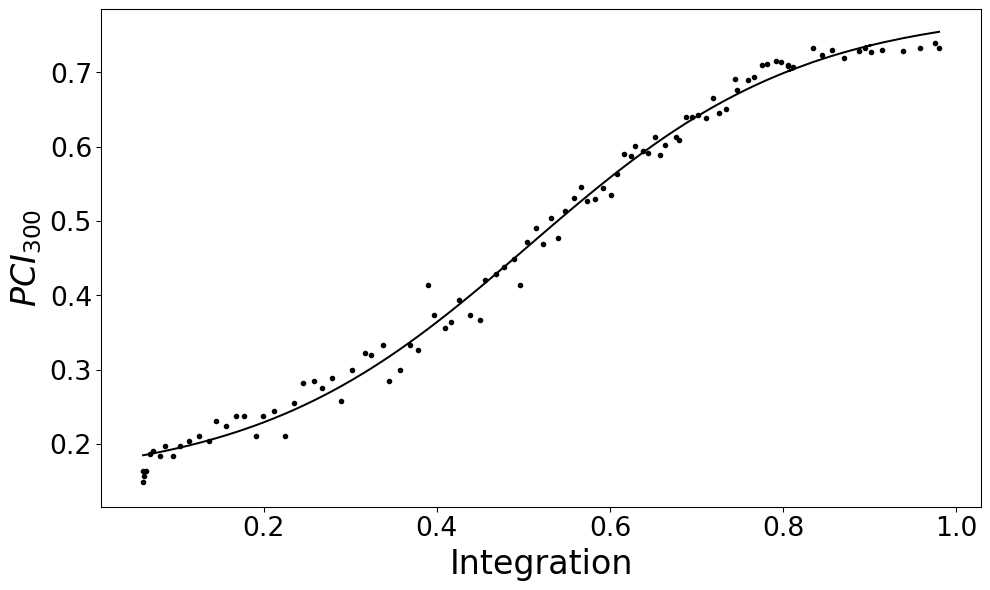

In [7]:
hfont = {'fontname':'Helvetica'}
my_dpi= 96
import scipy.optimize as opt
#plt.rc('font', family='serif')
plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')
G=np.arange(0,2.5,0.025)
def f(x, a, b, c, d):
    return a / (1. + np.exp(-c * (x - d))) + b

(a_, b_, c_, d_), _ = opt.curve_fit(f, mean_integ[0:-1], PCI_mean)

y_fit = f(mean_integ[0:-1], a_, b_, c_, d_)

fig,axs = plt.subplots(1, figsize=(1000/my_dpi, 600/my_dpi), dpi=my_dpi)

axs.scatter(mean_integ[0:-1],PCI_mean, ls='solid', c='k', s=10)
axs.plot(mean_integ[0:-1], y_fit, '-',c='k')
axs.set_xlabel('Integration',fontsize=25)
axs.tick_params(axis="x", labelsize=20)
axs.set_ylabel('$PCI_{300}$',fontsize=25)
axs.tick_params(axis="y", direction='out', top ='off',labelsize=20)
#axs.spines['right'].set_visible(False)
#axs.spines['top'].set_visible(False)
fig.tight_layout()

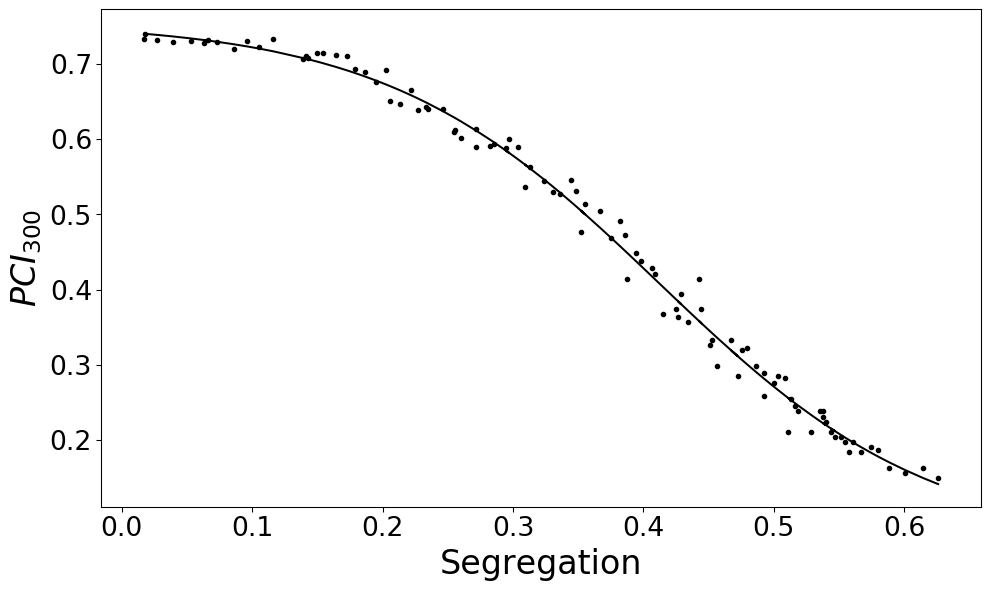

In [8]:
hfont = {'fontname':'Helvetica'}
my_dpi= 96
import scipy.optimize as opt
#plt.rc('font', family='serif')
plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')
G=np.arange(0,2.5,0.025)
def f(x, a, b, c, d):
    return -a / (1. + np.exp(-c * (x - d))) + b

(a_, b_, c_, d_), _ = opt.curve_fit(f, mean_Q3[0:-1], PCI_mean)

y_fit = f(mean_Q3[0:-1], a_, b_, c_, d_)

fig,axs = plt.subplots(1, figsize=(1000/my_dpi, 600/my_dpi), dpi=my_dpi)

axs.scatter(mean_Q3[0:-1],PCI_mean, ls='solid', c='k', s=10)
axs.plot(mean_Q3[0:-1], y_fit, '-',c='k')
axs.set_xlabel('Segregation',fontsize=25)
axs.tick_params(axis="x", labelsize=20)
axs.set_ylabel('$PCI_{300}$',fontsize=25)
axs.tick_params(axis="y", direction='out', top ='off',labelsize=20)
#axs.spines['right'].set_visible(False)
#axs.spines['top'].set_visible(False)
fig.tight_layout()

# Other Plots

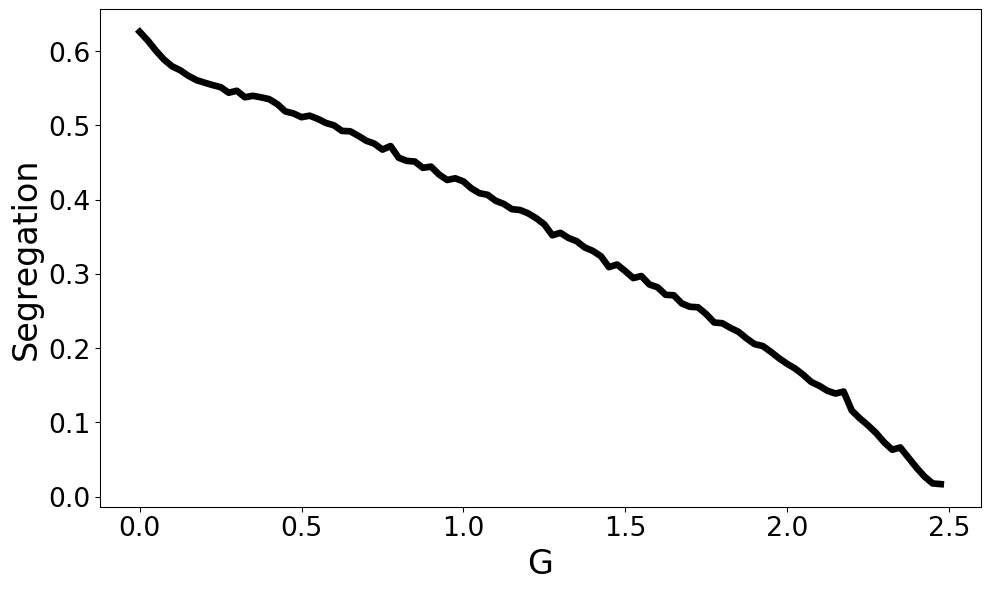

In [9]:
fig,axs = plt.subplots(1, figsize=(1000/my_dpi, 600/my_dpi), dpi=my_dpi)


axs.plot(G,mean_Q3[0:-1], ls='solid', c='k',linewidth=5)
axs.set_xlabel('G',fontsize=25)
axs.tick_params(axis="x", labelsize=20)
axs.set_ylabel('Segregation',fontsize=25)
axs.tick_params(axis="y", direction='out', top ='off',labelsize=20)
#axs.spines['right'].set_visible(False)
#axs.spines['top'].set_visible(False)
fig.tight_layout()

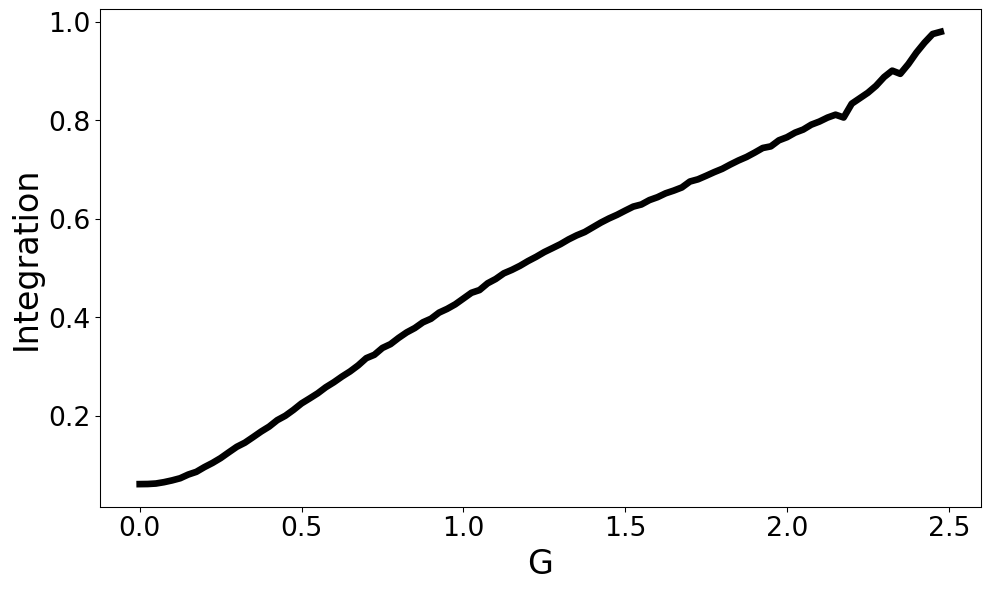

In [10]:
fig,axs = plt.subplots(1, figsize=(1000/my_dpi, 600/my_dpi), dpi=my_dpi)


axs.plot(G,mean_integ[0:-1], ls='solid', c='k',linewidth=5)
axs.set_xlabel('G',fontsize=25)
axs.tick_params(axis="x", labelsize=20)
axs.set_ylabel('Integration',fontsize=25)
axs.tick_params(axis="y", direction='out', top ='off',labelsize=20)
#axs.spines['right'].set_visible(False)
#axs.spines['top'].set_visible(False)
fig.tight_layout()